In [0]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

**LOAD DATASET**

In [0]:
file="housing.csv"
names = [ ' CRIM ' , ' ZN ' , ' INDUS ' , ' CHAS ' , ' NOX ' , ' RM ' , ' AGE ' , ' DIS ' , ' RAD ' , ' TAX ' , ' PTRATIO ' ,
' B ' , ' LSTAT ' , ' MEDV ' ]
dataset = read_csv(file,names=names,delim_whitespace=True)

**DATA ANALYSIS**

In [11]:
dataset.shape

(506, 14)

In [12]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [14]:
dataset.dtypes

 CRIM        float64
 ZN          float64
 INDUS       float64
 CHAS          int64
 NOX         float64
 RM          float64
 AGE         float64
 DIS         float64
 RAD           int64
 TAX         float64
 PTRATIO     float64
 B           float64
 LSTAT       float64
 MEDV        float64
dtype: object

In [15]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**DATA VISUALIZATION**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34f83f9e10>,
      dtype=object)

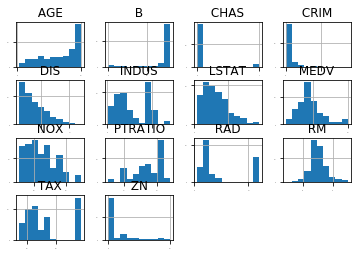

In [18]:
dataset.hist(xlabelsize=1, ylabelsize=1)

**CRIM, ZN, AGE, B HAVE EXPONENTIAL DISTRIBUTION.
RAD,TAX HAVE BIMODAL DISTRIBUTION.**

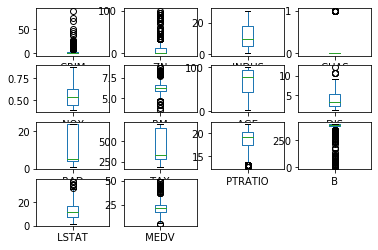

In [22]:
dataset.plot(kind='box', layout=(4,4),subplots=True)
pyplot.show()

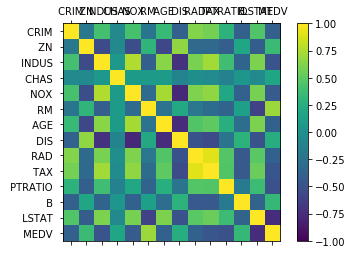

In [25]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin = -1, vmax =1,interpolation = 'none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

**VALIDATION DATASET**

In [0]:
a = dataset.values
X= a[:,0:13]
y= a[:,13]
split_size = 0.2
seed = 7
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size = split_size, random_state = seed)

**10-FOLD CROSS VALIDATION**

In [0]:
folds = 10
seed = 7
score = 'neg_mean_squared_error'

In [0]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [35]:
#calculate std and mean of MSE error
names = []
results = []

for name , model in models:
  kfold = KFold(n_splits = folds, random_state = seed)
  cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring = score)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR -21.37985572667869 9.414263656984865
LASSO -26.42356110840965 11.651109915777914
EN -27.502259350661717 12.305022264112704
KNN -41.89648839024391 13.901688149849864
CART -29.91347926829268 13.722023812960222
SVR -67.8278859731828 29.049137595262604


**ALGO HAVING LOWEST MSE : LR AND CART**

**PIPELINES**

In [42]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()), ('LR',LinearRegression() )])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()), ('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()), ('EN',ElasticNet())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsRegressor())])))
pipelines.append(( ' ScaledCART ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' CART ' ,
DecisionTreeRegressor())])))
pipelines.append(( ' ScaledSVR ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' SVR ' , SVR())])))
results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=folds, random_state=seed)
  cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring=score)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
 ScaledKNN : -20.107620 (12.376949)
 ScaledCART : -26.773330 (11.111585)
 ScaledSVR : -29.633086 (17.009186)


**KNN IS BEST**

In [45]:
#parameter tuning
# GRID SEARCH
scaler = StandardScaler().fit(xTrain)
rescale = scaler.transform(xTrain)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors = k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = score, cv= kfold)
grid_result = grid.fit(rescale,yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [48]:
grid_result.best_score_

-18.10930386178861

In [50]:
grid_result.best_params_

{'n_neighbors': 3}

**ENSEMBLE METHODS**

In [52]:
ensembles = []
ensembles.append(( ' ScaledAB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' AB ' ,
AdaBoostRegressor())])))
ensembles.append(( ' ScaledGBM ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' GBM ' ,
GradientBoostingRegressor())])))
ensembles.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RF ' ,
RandomForestRegressor())])))
ensembles.append(( ' ScaledET ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' ET ' ,
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=folds, random_state=seed)
  cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring=score)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledAB : -14.759988 (6.805448)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledGBM : -10.324802 (4.565335)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledRF : -12.427840 (6.893490)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledET : -9.112351 (5.496445)


In [57]:
# Tune scaled GBM
scaler = StandardScaler().fit(xTrain)
rescaledX = scaler.transform(xTrain)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, yTrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -9.379670 using {'n_estimators': 400}


**FINALIZE MODEL**

In [58]:
# prepare the model
scaler = StandardScaler().fit(xTrain)
rescaledX = scaler.transform(xTrain)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, yTrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
# transform the validation dataset
rescaledValidationX = scaler.transform(xTest)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(yTest, predictions))

11.902132586880027
